In [1]:
from xml.etree.ElementTree import parse
from matplotlib import pyplot as plt
import makeGIF
from glob import glob
import numpy as np
import json
import os


file_root = "dataset/INTERACTION-Dataset-DR-v1_1/maps/"
file_list = os.listdir(file_root)
s1 = set()
s1_sub =set()
way_dicts = []

for file in file_list:
#     file = file_list[file_num]
    if 'xy' in file:
        tree = parse(file_root + file)
        root = tree.getroot()
        node = root.findall('node')
        way = root.findall('way')
        relation = root.findall('relation')
        node_arr = []
        for n in node:
            x = float(n.get('x'))
            y = float(n.get('y'))
            node_arr.append([x,y])
        way_dict = []
        for w in way:
            t_dict = {}
            nds = w.findall("nd")
            xy = []
            for nd in nds:
                num = int(nd.get('ref'))-1000
                xy.append(node_arr[num])
            t_dict['node'] = xy
            t_dict['tag'] = {"type" : None, "subtype" : None}
            for t in w.findall("tag"):
                t_dict['tag'][t.get('k')] = t.get('v')
        #         tag_dict = {"type" : None, "subtype" : None}
        #         tag_dict[t.get('k')] = t.get('v')
        #         t_dict['tag'].append(tag_dict)
            way_dict.append(t_dict)
#         draw(way_dict)

        for w in way_dict:
            s1.add(w['tag']['type'])
            s1_sub.add(w['tag']['subtype'])
        #         s1.add(i['v'])
        way_dicts.append([way_dict, file])

In [2]:
def draw_object_data(data,map_xy, GIF_module,time = None):
    agent_xy = np.array(data["agent"]['xy'])
    agent_time = np.array(data["agent"]["time"])
    social_xy = np.array([np.array(d["xy"]) for d in data["social"]])
    social_time = np.array([np.array(d["time"]) for d in data["social"]])
    social_TE = []
    flag = True

    social_TE = np.array(data["TE"])
    
    social_TE -= min(min(social_TE),0)
    social_TE /= max(0.0001, max(social_TE))
        
    
    if time == None:
        plt.plot(agent_xy[:,0],agent_xy[:,1], color = "blue", zorder = 3)
        plt.scatter(agent_xy[:,0][-1],agent_xy[:,1][-1], color = "blue", zorder = 3)

        for i, xy in enumerate(social_xy):
            print(len(xy))
            start = np.where(social_time[i] >= agent_time[0])[0]
            end = np.where(social_time[i] <= agent_time[-1])[0]
            attend_time =  np.intersect1d(start, end)
            if len(attend_time) > 0:
                start = attend_time[0]
                end = attend_time[-1]
                print("st: ",start,end)
                print(social_time[i][0], social_time[i][-1])
                plt.plot(xy[:,0][:],xy[:,1][:], color = "black")
                plt.scatter(xy[:,0][-1],xy[:,1][-1], color = "black")
                plt.scatter(xy[:,0][-1],xy[:,1][-1], color = "red", alpha = social_TE[i], linewidths = 3, zorder = 4)
            else:
                print("NOT INCLUDE : ", social_time[i][0],social_time[i][-1])

    else:
        
        GIF_module.add_plot(map_xy, agent_xy,agent_time,social_xy,social_time, social_TE,time)
                
        
    plt.show()


100 11300


IndexError: index 115 is out of bounds for axis 0 with size 113

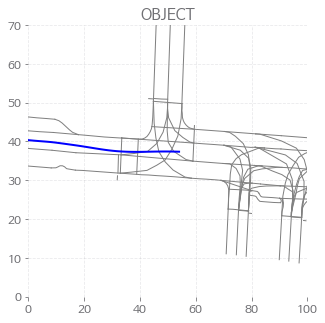

In [3]:

map_idx = 0  # interaction dataset의 map중 무슨 map으로 할 것인지
file_idx = 0 # mpa으로 만들어진 파일중 몇번째 파일을 사용할 것인지
map_name = way_dicts[map_idx][1].split(".")[0]


files_TE_data_object = glob("dataset/INTERACTION-Dataset-DR-v1_1/recorded_trackfiles/" + map_name + "/TE_by_object_ver4/*")
files_TE_data_scene = glob("TE_by_scene/" + map_name + "/*")

with open(files_TE_data_object[file_idx]) as data:
    data_object = json.load(data)

scene_idx = int(files_TE_data_object[file_idx].split("/")[-1].split("_")[2])
with open(files_TE_data_scene[scene_idx]) as data:
    data_scene = json.load(data)    


agent_id = data_object["agent"]["id"]
social_ids = [A["id"] for A in data_object["social"]]
for j, w in enumerate(way_dicts[0][0]):
    map_xy = np.array(w['node'])
#     plt.plot(xy[:,0]-950,xy[:,1]-950, color='gray',linewidth=1)
print(data_object["agent"]["time"][0], data_object["agent"]["time"][-1])

GIF_module = makeGIF.makeGIF("OBJECT", [0,100,0,70])
for i in range(10,220, 5):
    draw_object_data(data_object,way_dicts,GIF_module, i)
GIF_module.make_gif("test0001")

In [4]:

map_idx = 0  # interaction dataset의 map중 무슨 map으로 할 것인지

for file_idx in range(0, 30):
    map_name = way_dicts[map_idx][1].split(".")[0]


    files_TE_data_object = glob("dataset/INTERACTION-Dataset-DR-v1_1/recorded_trackfiles/" + map_name + "/TE_by_object_ver4/*")
    files_TE_data_scene = glob("TE_by_scene/" + map_name + "/*")

    with open(files_TE_data_object[file_idx]) as data:
        data_object = json.load(data)

    for j, w in enumerate(way_dicts[0][0]):
        map_xy = np.array(w['node'])
    #     plt.plot(xy[:,0]-950,xy[:,1]-950, color='gray',linewidth=1)
    print(data_object["agent"]["time"][0], data_object["agent"]["time"][-1])

    GIF_module = makeGIF.makeGIF("OBJECT", [0,120,0,80])
    for i in range(10,len(data_object["agent"]["xy"]), 5):
        draw_object_data(data_object,way_dicts,GIF_module, i)
    GIF_module.make_gif("results/" + str(file_idx))
    print(str(file_idx))

100 11300
0
2700 25400
1
6400 31200
2
12500 21500
3
19500 41300
4
20000 32500
5
22100 38600
6
24900 41900
7
26700 45000
8
27700 40600
9
29800 53400
10
30500 49100
11
37300 64800
12
41800 68600
13
46000 72500
14
46100 62600
15


IndexError: list index out of range

In [ ]:
data_object["agent"]["time"][-1]

In [ ]:

map_idx = 0  # interaction dataset의 map중 무슨 map으로 할 것인지
file_idx = 0 # mpa으로 만들어진 파일중 몇번째 파일을 사용할 것인지
map_name = way_dicts[map_idx][1].split(".")[0]


files_TE_data_object = glob("dataset/INTERACTION-Dataset-DR-v1_1/recorded_trackfiles/" + map_name + "/TE_by_object_ver4/*")
files_TE_data_scene = glob("TE_by_scene/" + map_name + "/*")

with open(files_TE_data_object[file_idx]) as data:
    data_object = json.load(data)





GIF_module = makeGIF.makeGIF("OBJECT", [0,100,0,70])
for i in range(10,220, 5):
    for j, w in enumerate(way_dicts[0][0]):
        map_xy = np.array(w['node'])
#         plt.plot(xy[:,0]-950,xy[:,1]-950, color='gray',linewidth=1)

    
    draw_object_data(data_object,map_xy ,GIF_module, i)
GIF_module.make_gif("test6")

In [ ]:
GIF_module.make_gif("test")

In [11]:
!ls

TE_by_scene		     computete_interaction.py  requiremnets.txt
TE_by_scene.tar		     dataset		       results
VisualizeDataset.ipynb	     infodynamics.jar	       sample.xml
VisualizeDataset_ver2.ipynb  main.py		       utill.py
__pycache__		     main_split.py	       새노트북.ipynb
computeTE_by_object.py	     makeGIF.py


In [12]:
!cat computeTE_by_object.py

import os
from sys import platform
import glob
import numpy as np
# from src.utils import *
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import csv
from tqdm import tqdm
import random
import math
import utill
import json
import copy

# +
visualize = False
minimum_length = 5000
TE = utill.calc_TE('6')

repeat = 10
length = 50 * 1000
stride = 25 * 1000
minimum_length = 7 * 1000
minimum_time_thresh_hold =  50*100
# -

paths = ["dataset/INTERACTION-Dataset-DR-v1_1/recorded_trackfiles/DR_USA_Intersection_EP0/",
"dataset/INTERACTION-Dataset-DR-v1_1/recorded_trackfiles/DR_USA_Intersection_EP1/",
"dataset/INTERACTION-Dataset-DR-v1_1/recorded_trackfiles/DR_CHN_Merging_ZS/",
"dataset/INTERACTION-Dataset-DR-v1_1/recorded_trackfiles/DR_CHN_Roundabout_LN/",
"dataset/INTERACTION-Dataset-DR-v1_1/recorded_trackfiles/DR_DEU_Merging_MT/",
"dataset/INTERACTION-Dataset-DR-v1_1/recorded_trackfiles/DR_DEU_Roundabout_OF/",
"dataset/INTERACTION-Dataset-DR-v1_1/recorded_trackfiles/DR_USA_I